# Algoritmo PRI (Principle of relevant information)

El presente algoritmo ilustra una solucion a un problema de optimizacion que busca un balance entre la redundancia de los datos y la distorcion de los mismos, expresado por la siguiente expresion

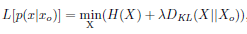

## Entradas

- X= es la version comprimida de los datos originales
- Xo= es la version original del conjunto de datos
- iter=iteraciones
- sigma=ancho del kernel
- alpha=parametro variacionalde divergencia 

## Salidas

- Xo= Conjunto de datos resultantes

# Procedimiento

### 1. Cargar las librerias
- cdist: calcula la distancia entre cada par de dos colecciones de entrada.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
- numpy:  es el paquete fundamental para computacion cientifica con pyhton
https://www.numpy.org/
- math: provee el acceso a operaciones basicas fundamentales
https://docs.python.org/2/library/math.html
- matplotlib:Es una libreria de graficos 2D que produce figuras de calidad
https://matplotlib.org/
- sklearns.datasets: contiene algunos conjuntos de datos embebidos
https://scikit-learn.org/stable/datasets/index.html

In [1]:
from scipy.spatial.distance import cdist
import numpy as np
import math as math
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons


### 2. Funcion PRI

dado que el algoritmo se desarrolla en un ambiente que inicialmente es dependiente de la cantidad de iteraciones se toma en consideracion un ciclo iterativo. Posterior a la consideracion inicial se toma la formula que emite la salida de la funcion , la cual esta definida por:

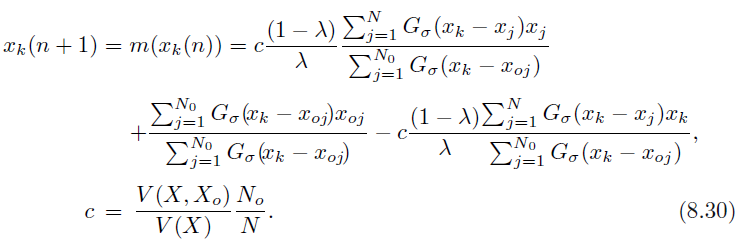

Al analizar la funcion se tienen partes fundamentales las cuales consisten en 

### 2.1 Distancias

En esta seccion de procede a ilustrar el paso inicial en el algoritmo, el cual consiste en elaborar un conjunto de distancias entre los datos, con el fin de poder realizar la funcion expuesta a continuacion 

Se puede apreciar que la funcion definida como G(.) esta compuesta por la distancia de un conjunto de elementos, al no ser la unica que se puede apreciar en la seccion 2 se elaboran todas las distancias entre los datos X y Xo
- X y Xo
- X y X
- Xo y Xo
- Para elaborar esta distancia se toma en consideracion la funcion cdist, funcion que comprende la distancia euclidea de un par de datos, definida por 

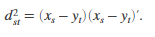

### 2.2 Kernels 

Retomando la formula expuesta en la seccion 2.1, se evidencia la funcion G(), la cual corresponde a un kernel , el cual inicialmente correspondera a un kernel gaussiano, definido por
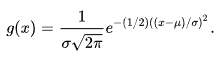

### 2.3 Potencial de informacion 

Al evidenciar la seccion 2 se evidencia una variable identificada por "c" que a su vez esta compuesta por una funcion V(.) y constantes N , a conitnuacion se dara claridad respecto a tales componentes
- Funcion V(.)= identificada como el potencial de informacion relaciona un conjunto mediante
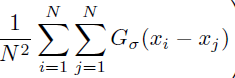
O un par de conjuntos mediante
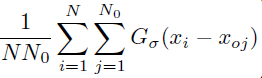
La finalidad de dicha funcion es expresar la fuerza que relaciona un par de elementos ya sea de un conjunto o de diferentes conjuntos 

### 2.4 Actualizacion 
Con cada parte especificada de la formula mostrada en la seccion dos se pasa a juntar todas las partes y a actualizar el valor de X dependiendo del valor de los hiper parametros y de la cantidad de iteraciones




In [2]:
def PRI(X,Xo,alpha,iter,sigma):
    
    i = 1
    NX = np.shape(X)[1]
    NXo = np.shape(Xo)[1]
    
    while i <= iter :
        
        ## Distances 
        Dx1 = cdist(X,X)
        Dx2 = cdist(Xo,Xo)
        Dx3 = cdist(Xo,X)
        
        ## Kernels
        K1 = 1/math.sqrt(2*np.pi*sigma**2)*np.exp(-Dx1**2/(2*sigma**2))
        K2 = 1/math.sqrt(2*np.pi*sigma**2)*np.exp(-Dx2**2/(2*sigma**2))
        K3 = 1/math.sqrt(2*np.pi*sigma**2)*np.exp(-Dx3**2/(2*sigma**2))
        
        # Potencial of information
        V1 = 1/NX*np.sum(K1,axis=1)
        V1 = 1/NX*np.sum(V1)
        V2 = 1/NXo*np.sum(K2,axis=1)
        V2 = 1/NXo*np.sum(V2)
        V3 = 1/NX*np.sum(K3,axis=1)
        V3 = 1/NXo*np.sum(V3)
        
        # Xn-1
        Xk = Xo
        
        #Update
        if not(alpha==0):
            c=(V3/V2)*(NXo/NX)
            Xo =  c*(1-alpha)/alpha*((K2@Xk)/(K3@np.ones(np.shape(X))))+((K3@X)/(K3@np.ones(np.shape(X))))- c*(1-alpha)/alpha*(K2@np.ones(np.shape(Xk))/(K3@np.ones(np.shape(X))))*Xk
        else:
            Xo=((K3@X)/(K3@np.ones(np.shape(X))))
        i=i+1
        plt.plot(Xo[:,0], Xo[:,1], 'ro')
        plt.show()
        plt.pause(1)
        plt.clf()
        plt.plot(X[:,0], X[:,1], 'x')

    return Xo


# Prueba 
Para esta seccion se decide utilizar un modelo similar al que se plantea en el libro (Information Theoretic Learning) en el cual se ilustra 
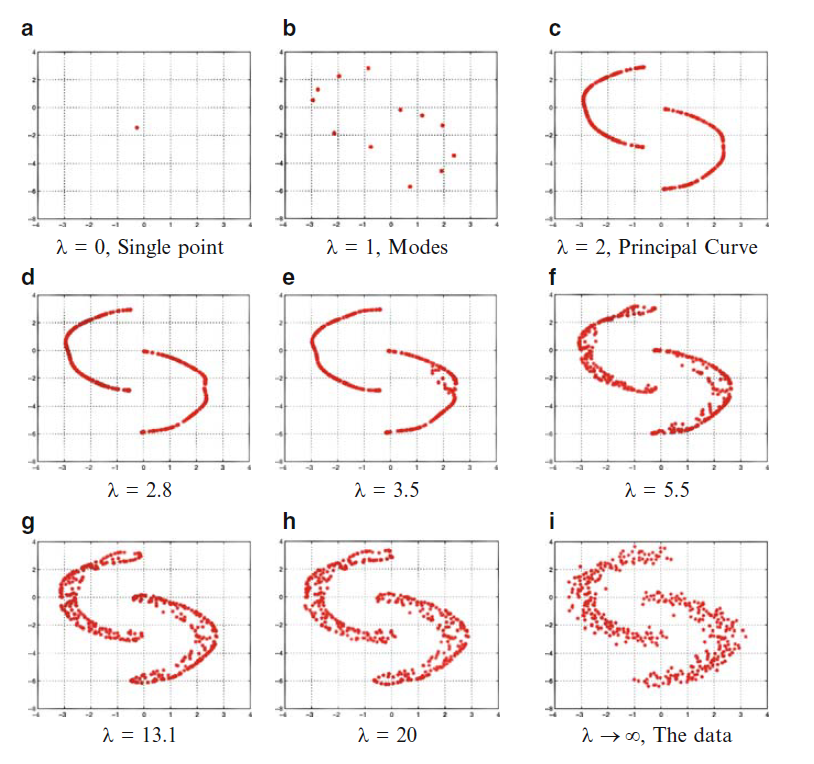
Al imitar esta prueba con los mismos hiper paramtros y para 100 iteraciones 


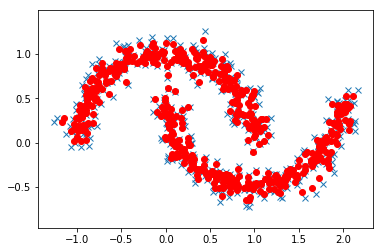

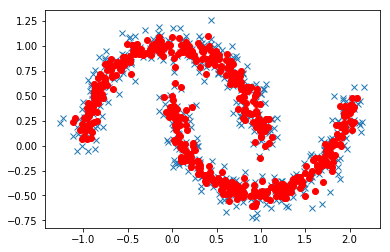

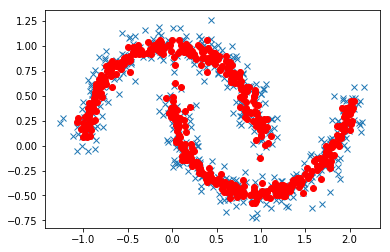

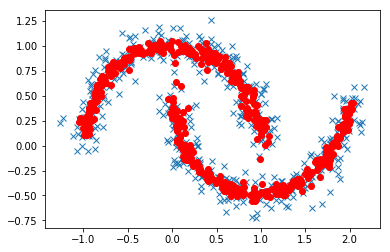

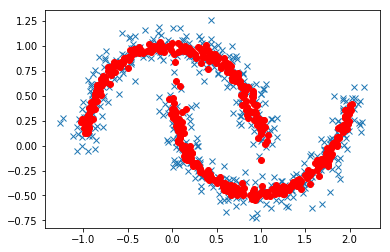

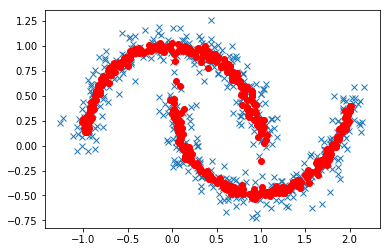

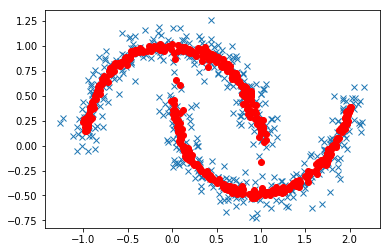

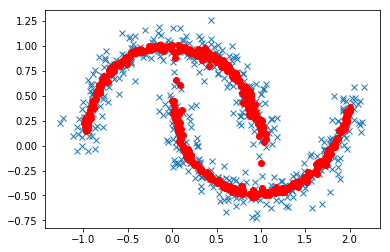

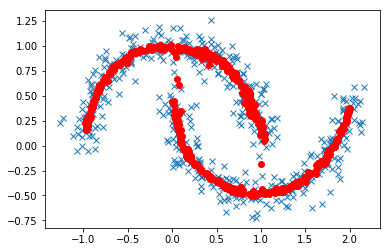

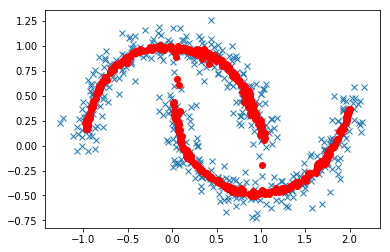

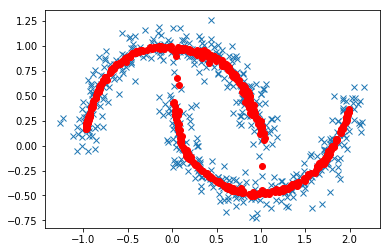

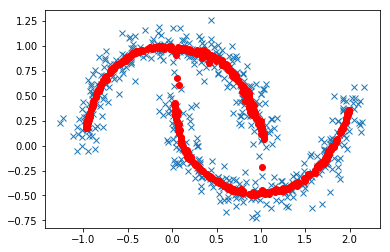

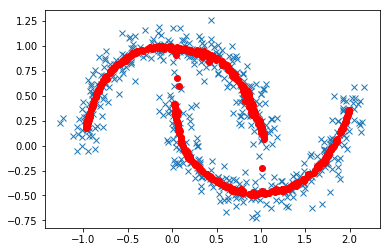

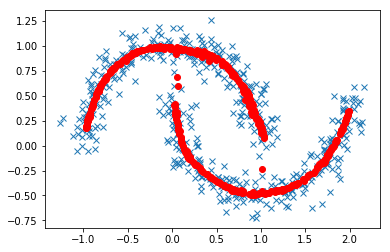

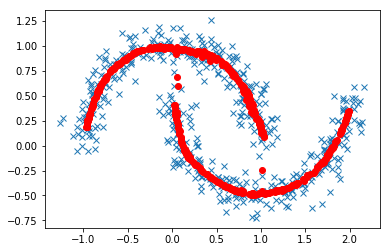

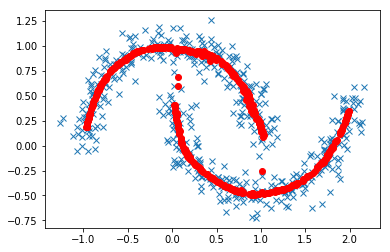

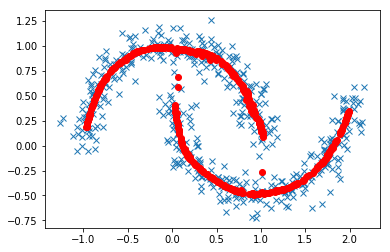

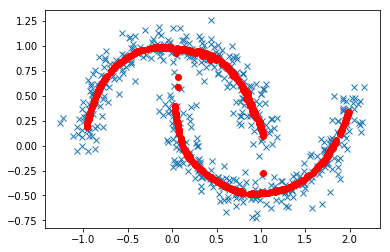

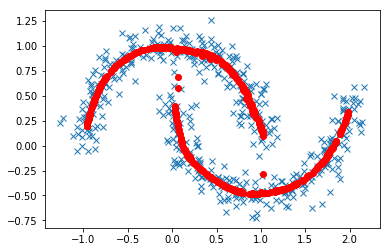

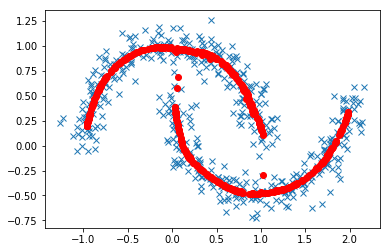

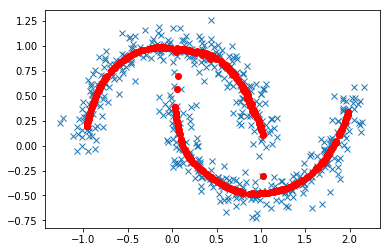

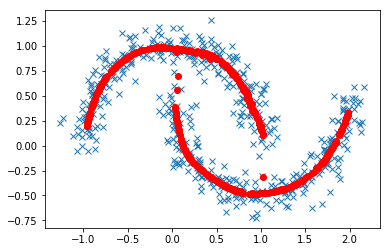

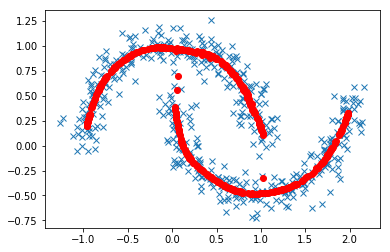

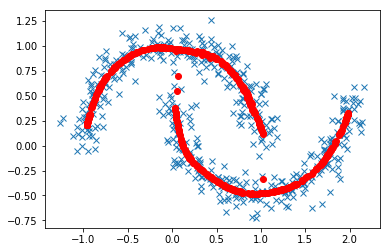

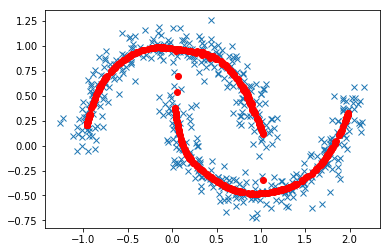

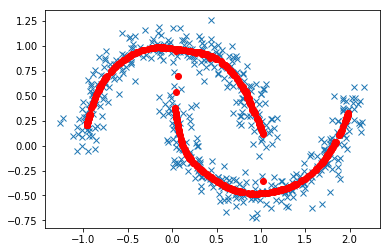

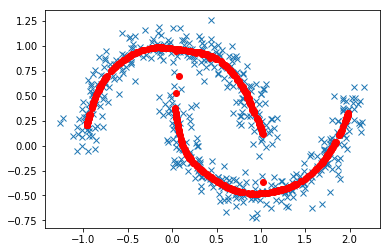

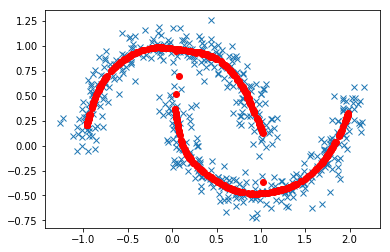

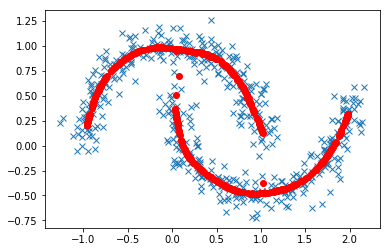

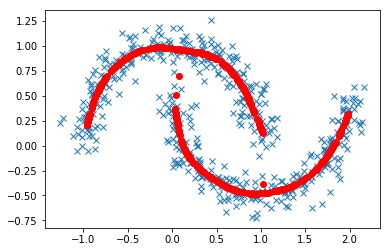

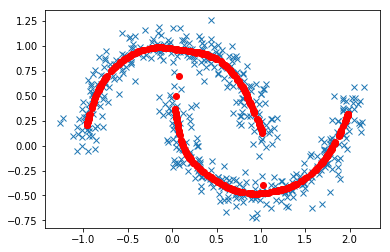

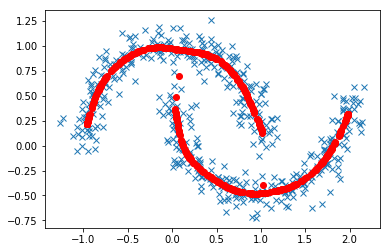

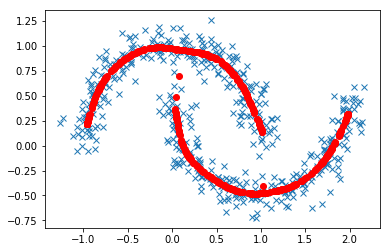

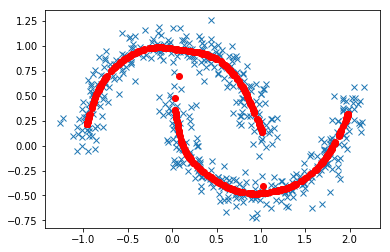

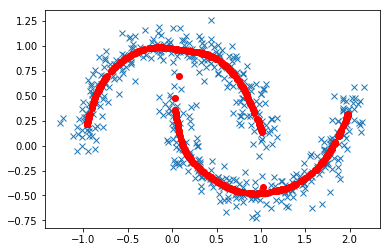

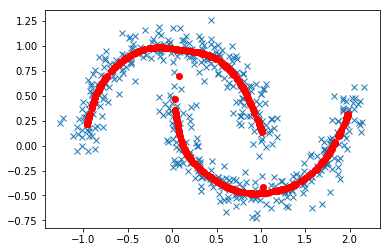

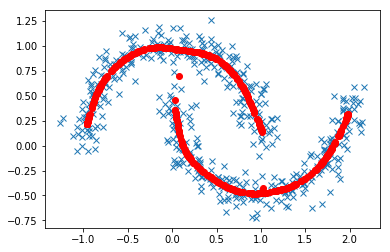

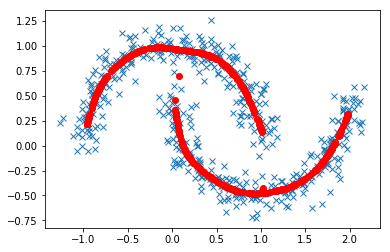

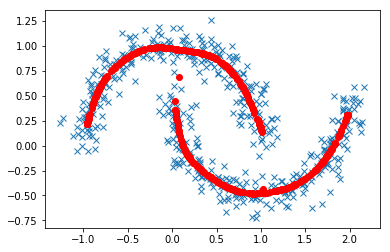

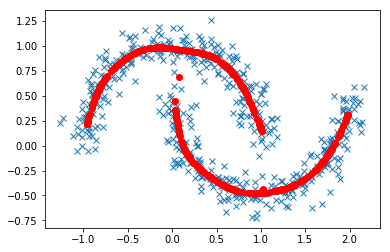

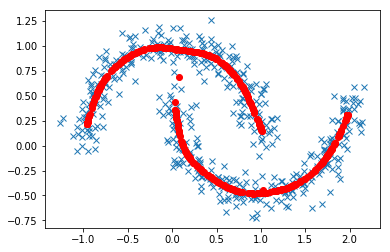

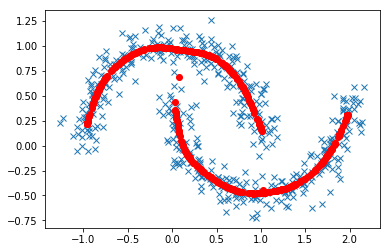

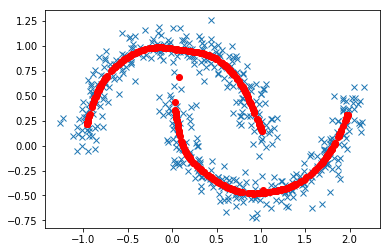

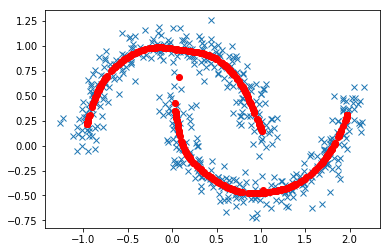

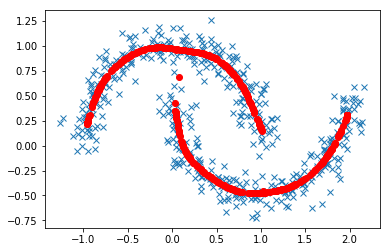

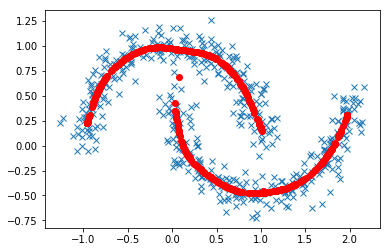

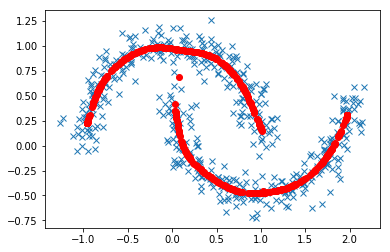

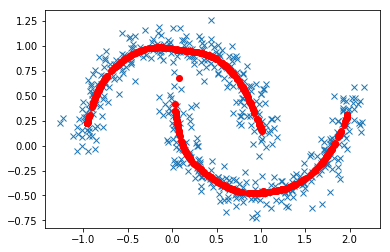

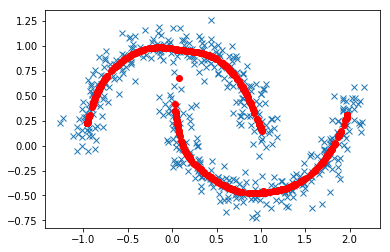

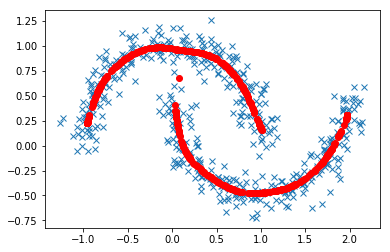

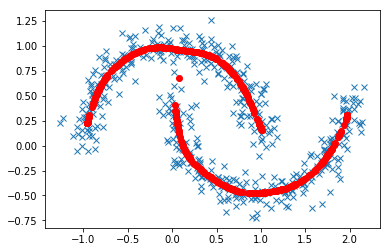

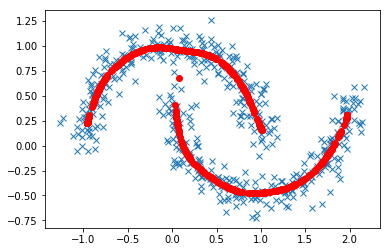

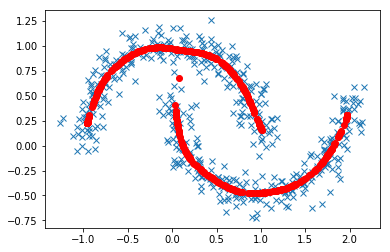

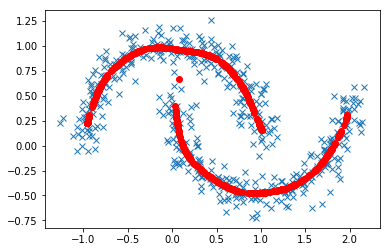

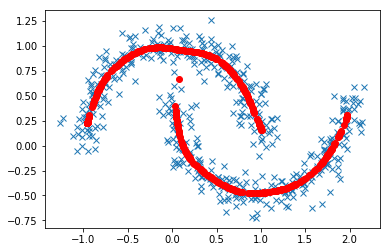

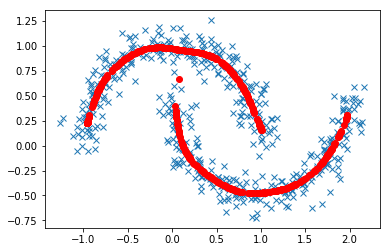

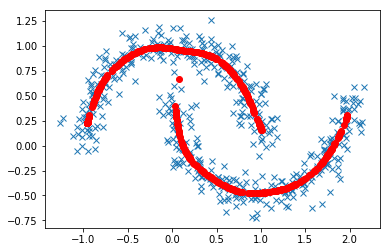

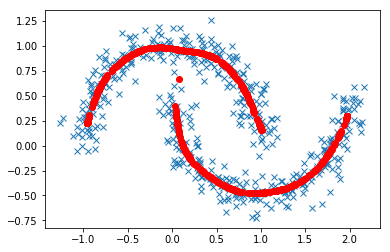

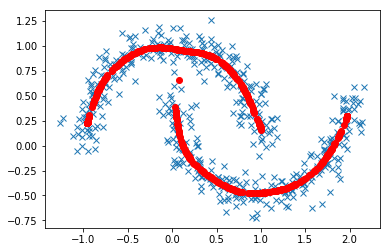

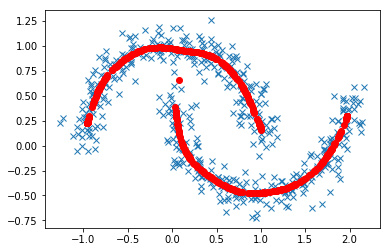

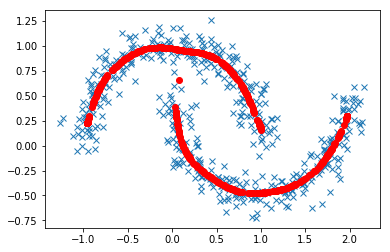

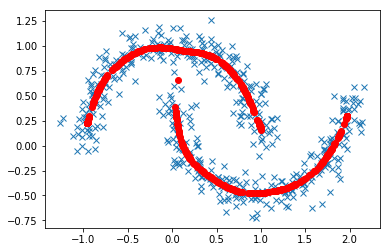

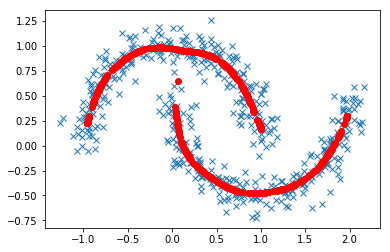

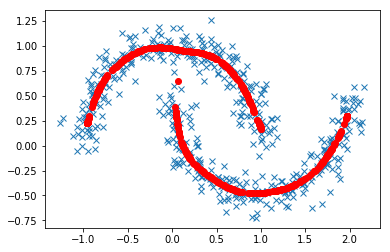

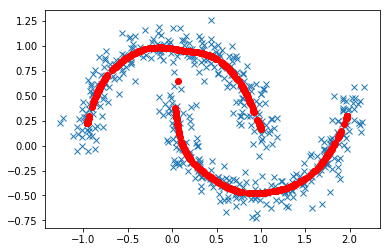

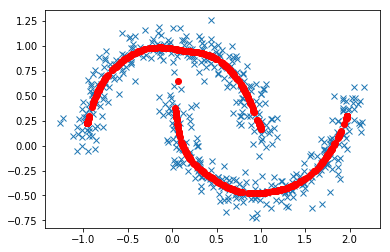

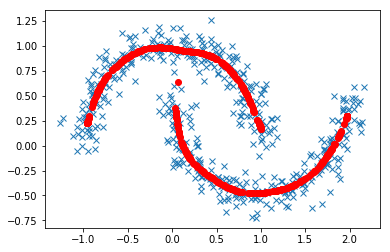

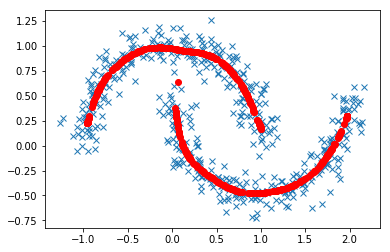

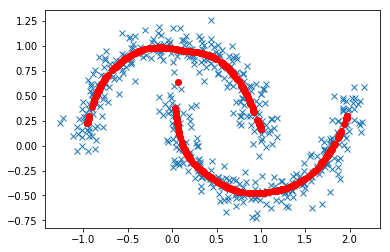

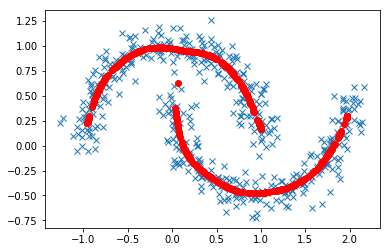

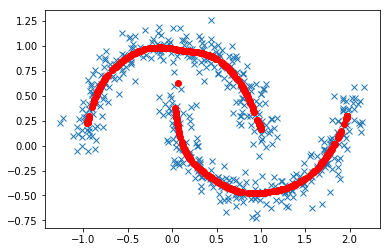

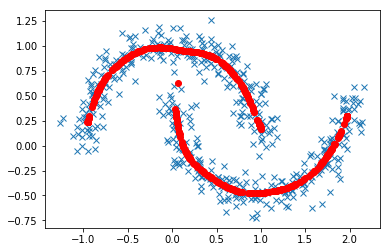

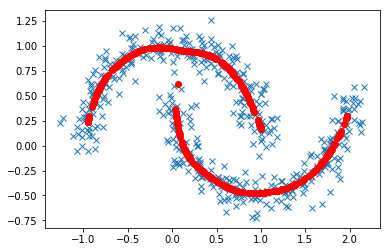

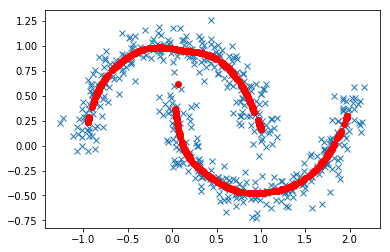

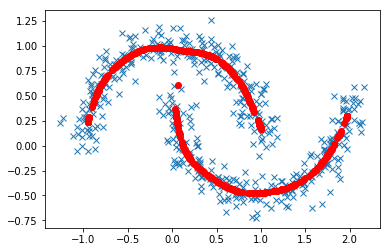

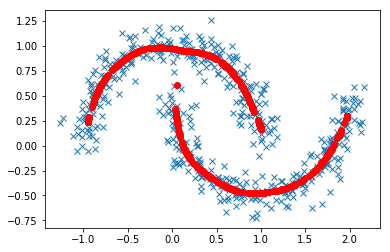

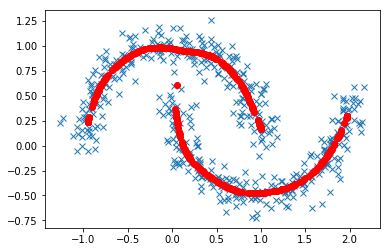

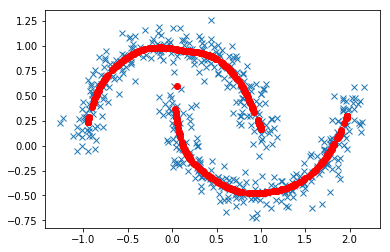

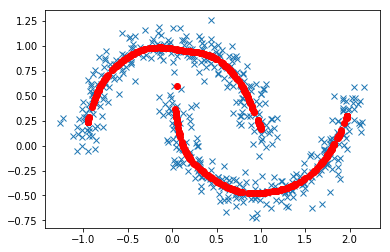

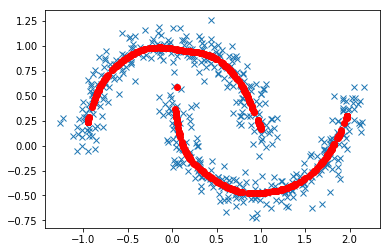

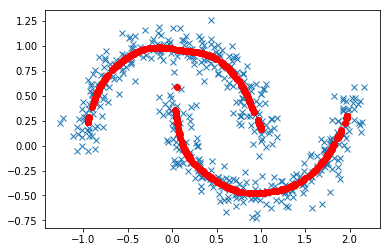

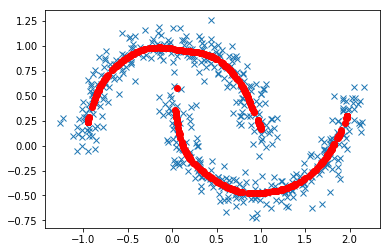

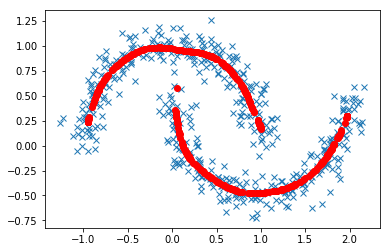

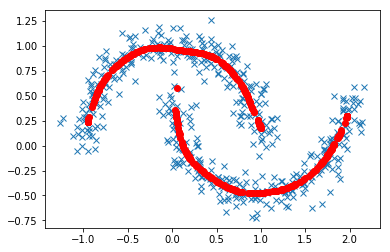

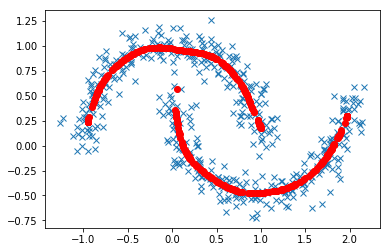

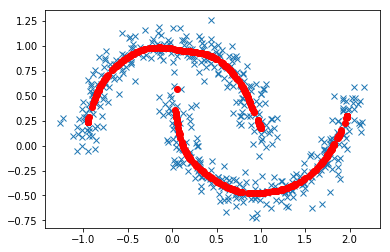

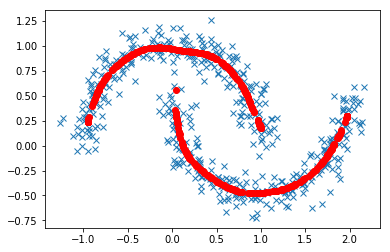

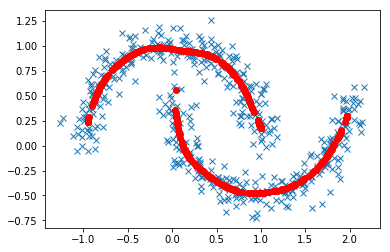

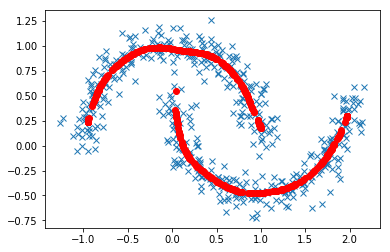

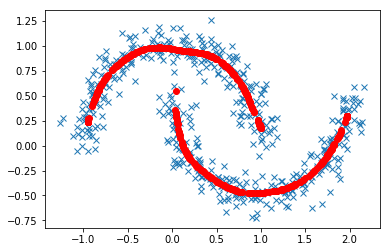

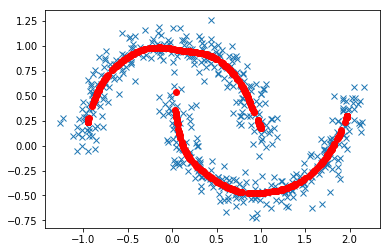

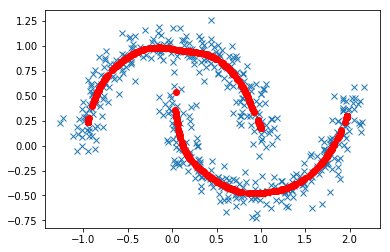

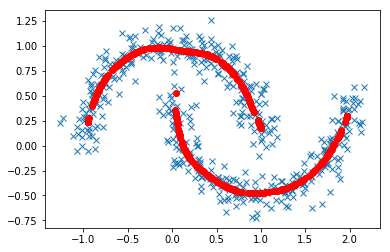

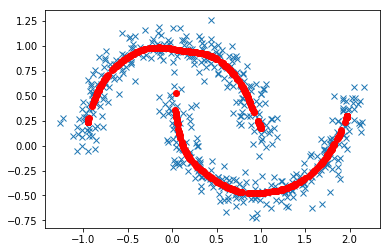

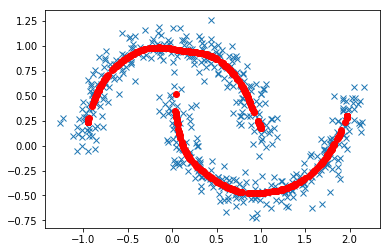

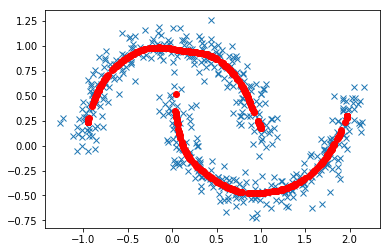

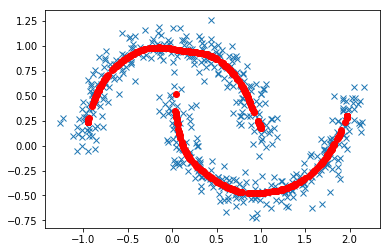

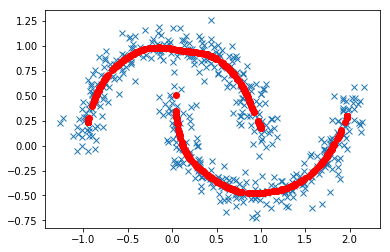

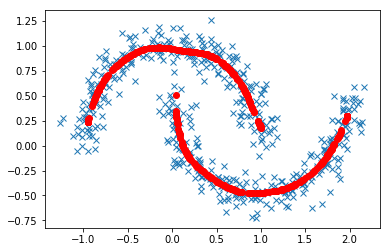

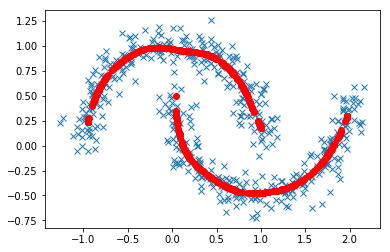

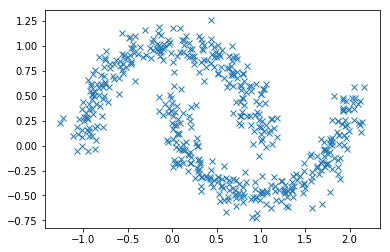

In [3]:

X, y = make_moons(n_samples=500, noise=0.1)
sigma = 0.22
iter = 100
alpha = 2.8
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
Xom = PRI(X,X,alpha,iter,sigma)